# Risky Business:  
## An Evaluation of Profit and Risk in the Movie Industry

This presentation is a preliminary analysis for a possible entry to the entertainment industry for Microsoft.  With these analyses we explore world wide box office gross with respect to budget and genre to give insight into profitability of different genres of film.  For this analysis we use data sets from two popular entertainment industry databases.  Our final analysis uses data from the 'Internet Movie Database' and the 'The Numbers' database.  These data sets were selected based on the content and quality of data.  We needed genre information, production budget, worldwide and domestic grosses, release date.  In the cleaning process we eliminated some information that was not usefull for the analysis and some data was incomplete or lost in the combining of data sets.   While we do use world wide gross in our calculations, the samples used were curated for movies relevant to a western audience.  Optimizing content for internationalal audiences is more complex and beyond the scope of this work. 

In [1]:
import moviefunctions as mf

The following cell cleans and merges the two datasets. The variable 'imdb' imports data from 'imdb_basics' and removes runtime data, as it will not factor in to this analysis; further, some rows without genre information are removed.   Finally we change the column label 'tconst' to the more clear 'movie_id'. Second we import and clean the 'The Numbers' data set as variable 'tn'.  This set has the primary budget and worldwide gross information that will be critical for the analysis.  We import this data, drop a column of irrelevant information, change one of the column labels, and use the custom function to prepare the financial information for calculation.  Then we add a column to the end of the data set called 'budget_gross_ratio" that contains a ratio of the world wide box office returns divided by the production budget.  This ratio is our primary metric of the profitability of a film.  

In [2]:
imdb = mf.imdb_clean()
tn = mf.tn_clean()
data = mf.mergetables(tn, imdb)

This is a printout of the head of the cleaned and prepared data set.  This data set has about 2000 rows.  the original 'imdb' dataset had over 140000 rows.  it contained information on almost every movie made in the world for the past 100 years.  At first this loss of data may appear significant.  This data set are almost entirely derived from movies made in the last 20 years for a western audience and for which there is accurate box office data.   The authors would argue the current data set is more relevant to Microsoft's decision as it will more accurately reflect the taste of Microsoft's most likely audience.

In [3]:
data.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,genres,net_profit
0,2009,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",6.53,Horror,"2,351,345,279.00"
1,2011,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2.55,"Action,Adventure,Fantasy","635,063,875.00"
2,2019,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",0.43,"Action,Adventure,Sci-Fi","-200,237,650.00"
3,2015,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",4.24,"Action,Adventure,Sci-Fi","1,072,413,963.00"
4,2018,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",6.83,"Action,Adventure,Sci-Fi","1,748,134,200.00"


In [4]:
# data.sort_values(by='budget_gross_ratio',ascending=False).head(20)
# data.sort_values(by='net_profit',ascending=False).head(20)

### A visualization of risk

This is a histogram visualizing the averge likelihood of profit of a film project. The x-axis represents the ratio of world wide gross to production budget and the y-axis represents the number of films in that bin of profitability. Notice the profound positive skew in the distribution.  This relfects the fact that a large number of movies produced do not meet the criteria for financial profitability represented by the vertical red line.  

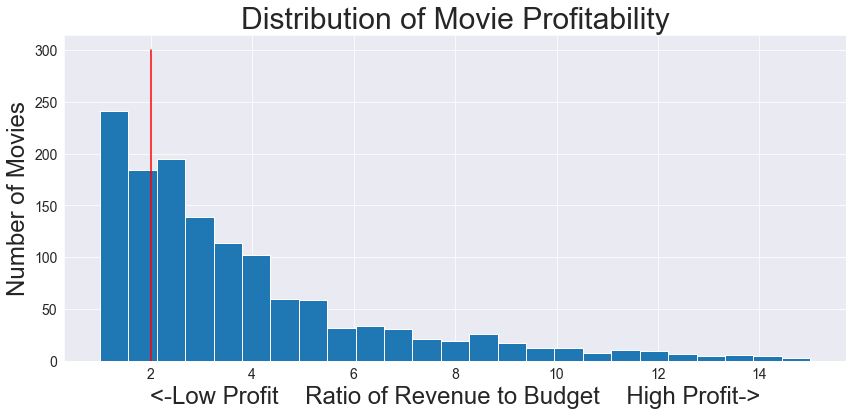

In [5]:
mf.make_bgr_hist_plot(data)

In [6]:
indices = data.genres.value_counts()[:16].index
indices

Index(['Drama', 'Documentary', 'Comedy', 'Comedy,Drama',
       'Adventure,Animation,Comedy', 'Comedy,Drama,Romance',
       'Action,Adventure,Sci-Fi', 'Drama,Romance', 'Action,Crime,Drama',
       'Comedy,Romance', 'Action,Adventure,Fantasy', 'Horror',
       'Drama,Thriller', 'Action,Comedy,Crime', 'Horror,Mystery,Thriller',
       'Horror,Thriller'],
      dtype='object')

This visualization compares the average world wide gross divided by production budget, disaggregated by genre.  The rule of thumb for profitability is a world wide gross to budget ratio of 2.  This calculation reflects a typical industry estimate, that the marketing and overhead costs typically matches, dollar for dollar, the production budget.  To make back the initial investment, a film must double the production budget.  With this in mind we can begin to get a feel for the expected financial risk of a film in a specific genre.  The red line represents the threshold of profitability

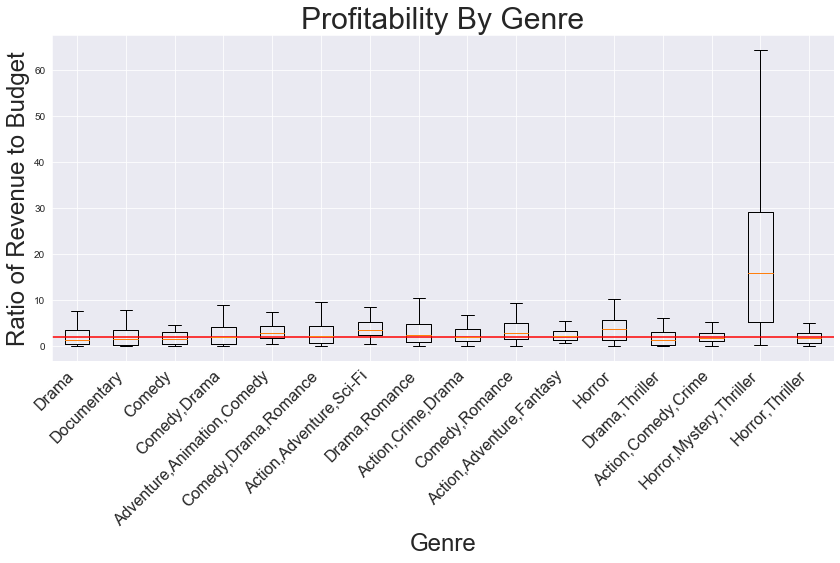

In [7]:
mf.make_bgr_boxplot(data, indices)

This visualization represents a box and whisker plot of the net profit information by genre.  Here we can see the mean, but also the interquartile range and range of the tail ends of the distribution of expected return by genre.  The whisker component represents the spread of the first and fourth quartile.   The longer the spread of the graph, the less precision there is in predicting expected return from a project.  This information is useful as it visualizes the higher profit potential of the science fiction, animation, and action genres.  These movies typically cost more to make, but can provide greater return if the financier can accept the risk of producing in these genre.

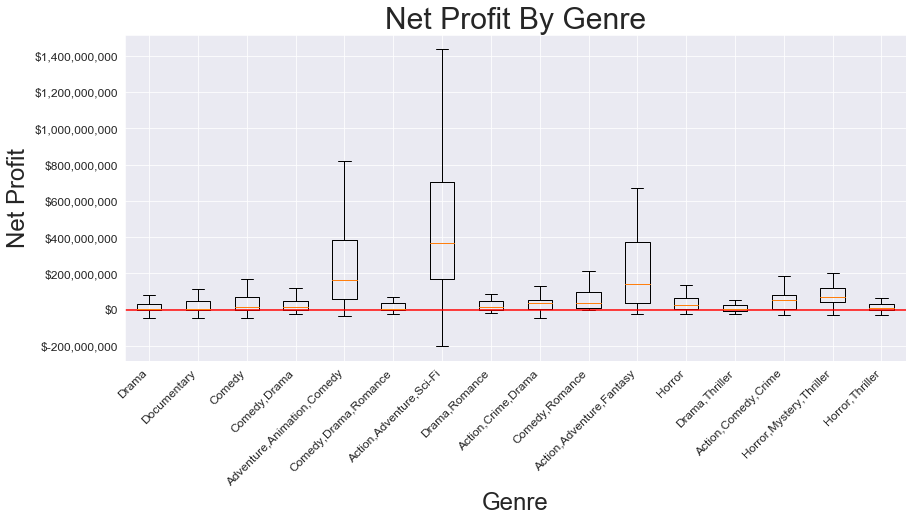

In [8]:
mf.make_gross_boxplot(data, indices)

# Conclusion
These analyses indicate the the movie industry holds potential for great financial loss or gain .  Modern consumers of cinema have many high quality options to choose from.  An entry to this highly competitive marketplace must involve a rare mix of caution, to protect the investment and eccentric creative energy to create art that that can stand out and compete in a fast evolving creative marketplace.

# Next Steps

Another potential route of analysis would be to break down the data into decades and compare the trend of genres over time.  Below is a preliminary visualization.

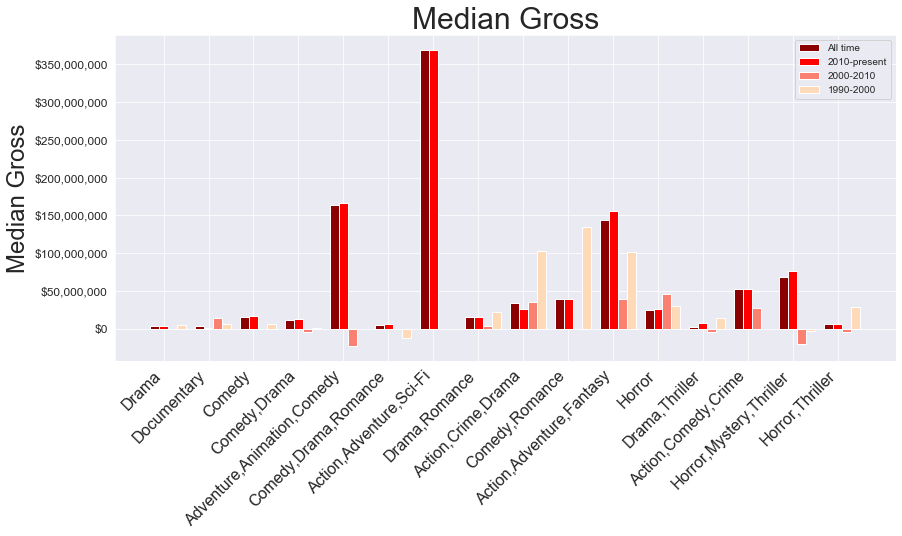

In [9]:
mf.make_time_bar(data, indices)